# FAKE NEWS DETECTION PROJECT

### Loading the dataset 

In [1]:
import pandas as pd

df = pd.read_csv("fake_news_kaggle/train.csv")
df.dropna(inplace = True)

In [2]:
print("Shape of News data:", df.shape)
print("News data columns", df.columns)

Shape of News data: (18285, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [3]:
display(df.head())

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
df.text=df.title+" "+df.author+" "+df.text

In [3]:
df=df.drop(['id','title','author'],axis=1)

In [6]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


0    10361
1     7924
Name: label, dtype: int64


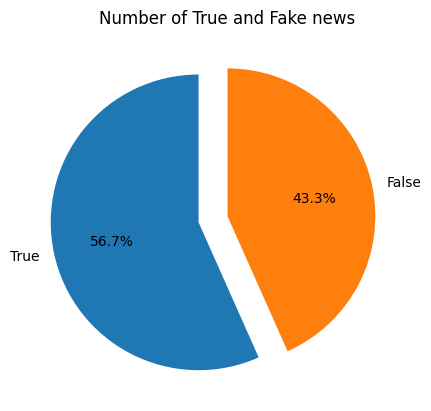

In [46]:
import matplotlib.pyplot as plt

print(df.label.value_counts())
plt.title("Number of True and Fake news")
plt.pie(df.label.value_counts(),labels=["True","False"],autopct='%1.1f%%',explode =[0.2,0], startangle=90)
plt.show()

In [8]:
text_length = df.text.str.split().str.len()
text_length.describe()

count    18285.000000
mean       818.056440
std        886.831104
min          4.000000
25%        318.000000
50%        625.000000
75%       1110.000000
max      24245.000000
Name: text, dtype: float64

In [9]:
percentile25 = text_length.quantile(.1)
percentile75 = text_length.quantile(.99)

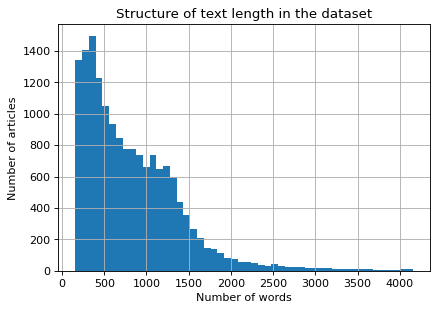

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(6, 4), dpi=80)
plt.hist(text_length,bins=50,range=(percentile25, percentile75))
plt.ylabel('Number of articles')
plt.xlabel('Number of words')
plt.title('Structure of text length in the dataset')
plt.grid(True)
plt.show()

## Cleaning data

In [11]:
df[df.text.str.split().str.len() < 300]

,text,label
4,Iranian woman jailed for fictional unpublished...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,0
13,US Officials See No Link Between Trump and Rus...,1
22,Rob Reiner: Trump Is ’Mentally Unstable’ - Bre...,0
56,Ep. 544 FADE to BLACK Jimmy Church w/ Laura Ei...,1
...,...,...
20775,How this WWII airman is helping veterans heal ...,1
20777,Editor of Austria’s Largest Paper Charged with...,1
20781,Time is Running Out to Stop Kratom Ban – Need ...,1
20787,Sally Yates Won’t Say If Trump Was Wiretapped ...,0


In [12]:
df.text[4]

'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery Howard Portnoy Print \nAn Iranian woman has been sentenced to six years in prison after Iran’s Revolutionary Guard searched her home and found a notebook that contained a fictional story she’d written about a woman who was stoned to death, according to the Eurasia Review . \nGolrokh Ebrahimi Iraee, 35, is the wife of political prisoner Arash Sadeghi, 36, who is serving a 19-year prison sentence for being a human rights activist, the publication reported. \n“When the intelligence unit of the Revolutionary Guards came to arrest her husband, they raided their apartment – without a warrant – and found drafts of stories that Ebrahimi Iraee had written,” the article stated. \n“One of the confiscated drafts was a story about stoning women to death for adultery – never published, never presented to anyone,” the article stated. “The narrative followed the story of a protagonist that watched a movie ab

### Remove all besides text (mainly punctuaction)

In [4]:
df.text = df.text.str.replace('[^\w\s]','',regex=True)
df.text = df.text.str.replace('\n','')

In [14]:
df.text[4]

'Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery Howard Portnoy Print An Iranian woman has been sentenced to six years in prison after Irans Revolutionary Guard searched her home and found a notebook that contained a fictional story shed written about a woman who was stoned to death according to the Eurasia Review  Golrokh Ebrahimi Iraee 35 is the wife of political prisoner Arash Sadeghi 36 who is serving a 19year prison sentence for being a human rights activist the publication reported When the intelligence unit of the Revolutionary Guards came to arrest her husband they raided their apartment  without a warrant  and found drafts of stories that Ebrahimi Iraee had written the article stated One of the confiscated drafts was a story about stoning women to death for adultery  never published never presented to anyone the article stated The narrative followed the story of a protagonist that watched a movie about stoning of women under Islami

### Lowering the text

In [5]:
df.text = df.text.str.lower()

In [16]:
df.text[4]

'iranian woman jailed for fictional unpublished story about woman stoned to death for adultery howard portnoy print an iranian woman has been sentenced to six years in prison after irans revolutionary guard searched her home and found a notebook that contained a fictional story shed written about a woman who was stoned to death according to the eurasia review  golrokh ebrahimi iraee 35 is the wife of political prisoner arash sadeghi 36 who is serving a 19year prison sentence for being a human rights activist the publication reported when the intelligence unit of the revolutionary guards came to arrest her husband they raided their apartment  without a warrant  and found drafts of stories that ebrahimi iraee had written the article stated one of the confiscated drafts was a story about stoning women to death for adultery  never published never presented to anyone the article stated the narrative followed the story of a protagonist that watched a movie about stoning of women under islami

### Tokenization

In [6]:
df['text']=df.apply(lambda row: row['text'].split(),axis=1)

In [18]:
print(df.text[4],)

['iranian', 'woman', 'jailed', 'for', 'fictional', 'unpublished', 'story', 'about', 'woman', 'stoned', 'to', 'death', 'for', 'adultery', 'howard', 'portnoy', 'print', 'an', 'iranian', 'woman', 'has', 'been', 'sentenced', 'to', 'six', 'years', 'in', 'prison', 'after', 'irans', 'revolutionary', 'guard', 'searched', 'her', 'home', 'and', 'found', 'a', 'notebook', 'that', 'contained', 'a', 'fictional', 'story', 'shed', 'written', 'about', 'a', 'woman', 'who', 'was', 'stoned', 'to', 'death', 'according', 'to', 'the', 'eurasia', 'review', 'golrokh', 'ebrahimi', 'iraee', '35', 'is', 'the', 'wife', 'of', 'political', 'prisoner', 'arash', 'sadeghi', '36', 'who', 'is', 'serving', 'a', '19year', 'prison', 'sentence', 'for', 'being', 'a', 'human', 'rights', 'activist', 'the', 'publication', 'reported', 'when', 'the', 'intelligence', 'unit', 'of', 'the', 'revolutionary', 'guards', 'came', 'to', 'arrest', 'her', 'husband', 'they', 'raided', 'their', 'apartment', 'without', 'a', 'warrant', 'and', 'fo

### Stopwords removal

In [7]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stopwords = [word.replace('\'','') for word in stopwords]

In [8]:
df['text']=df.apply(lambda row: [word for word in row['text'] if not word in stopwords],axis=1)

In [21]:
print(df.text[4],)

['iranian', 'woman', 'jailed', 'fictional', 'unpublished', 'story', 'woman', 'stoned', 'death', 'adultery', 'howard', 'portnoy', 'print', 'iranian', 'woman', 'sentenced', 'six', 'years', 'prison', 'irans', 'revolutionary', 'guard', 'searched', 'home', 'found', 'notebook', 'contained', 'fictional', 'story', 'shed', 'written', 'woman', 'stoned', 'death', 'according', 'eurasia', 'review', 'golrokh', 'ebrahimi', 'iraee', '35', 'wife', 'political', 'prisoner', 'arash', 'sadeghi', '36', 'serving', '19year', 'prison', 'sentence', 'human', 'rights', 'activist', 'publication', 'reported', 'intelligence', 'unit', 'revolutionary', 'guards', 'came', 'arrest', 'husband', 'raided', 'apartment', 'without', 'warrant', 'found', 'drafts', 'stories', 'ebrahimi', 'iraee', 'written', 'article', 'stated', 'one', 'confiscated', 'drafts', 'story', 'stoning', 'women', 'death', 'adultery', 'never', 'published', 'never', 'presented', 'anyone', 'article', 'stated', 'narrative', 'followed', 'story', 'protagonist',

### Stemming

In [9]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
df['text']=df.apply(lambda row: [porter_stemmer.stem(word) for word in row['text']],axis=1)

In [11]:
print(df.text[4],)

['iranian', 'woman', 'jail', 'fiction', 'unpublish', 'stori', 'woman', 'stone', 'death', 'adulteri', 'howard', 'portnoy', 'print', 'iranian', 'woman', 'sentenc', 'six', 'year', 'prison', 'iran', 'revolutionari', 'guard', 'search', 'home', 'found', 'notebook', 'contain', 'fiction', 'stori', 'shed', 'written', 'woman', 'stone', 'death', 'accord', 'eurasia', 'review', 'golrokh', 'ebrahimi', 'irae', '35', 'wife', 'polit', 'prison', 'arash', 'sadeghi', '36', 'serv', '19year', 'prison', 'sentenc', 'human', 'right', 'activist', 'public', 'report', 'intellig', 'unit', 'revolutionari', 'guard', 'came', 'arrest', 'husband', 'raid', 'apart', 'without', 'warrant', 'found', 'draft', 'stori', 'ebrahimi', 'irae', 'written', 'articl', 'state', 'one', 'confisc', 'draft', 'stori', 'stone', 'women', 'death', 'adulteri', 'never', 'publish', 'never', 'present', 'anyon', 'articl', 'state', 'narr', 'follow', 'stori', 'protagonist', 'watch', 'movi', 'stone', 'women', 'islam', 'law', 'adulteri']


## Data exploration

In [24]:
true_df=df[df["label"]==0]
true_df = true_df.drop('label', axis=1)
false_df=df[df["label"]==1]
false_df = false_df.drop('label', axis=1)

### Wordcount barplot true/false

In [25]:
true_counter = true_df.explode('text').value_counts()
false_counter = false_df.explode('text').value_counts()

In [26]:
true_counter

text       
mr             69206
said           68040
trump          38229
new            26265
time           24462
               ...  
overembroid        1
dever              1
overeach           1
overdub            1
ﬁnd                1
Length: 71798, dtype: int64

In [27]:
true_counter = true_counter.to_frame().reset_index()
true_counter = true_counter.rename(columns={'text':'word', 0:'count'})
false_counter = false_counter.to_frame().reset_index()
false_counter = false_counter.rename(columns={'text':'word', 0:'count'})

In [28]:
print(true_counter.columns)

Index(['word', 'count'], dtype='object')


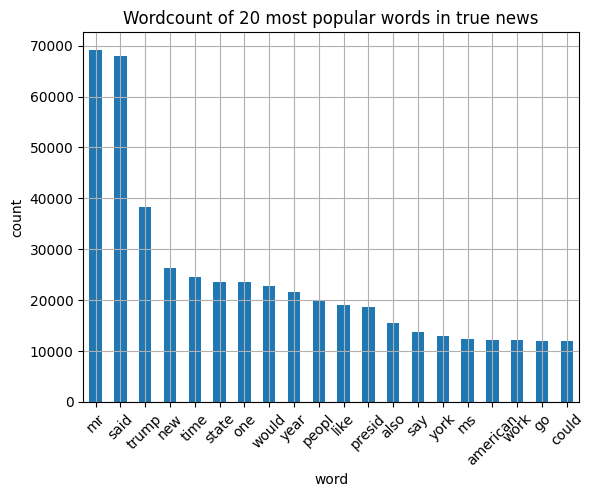

In [29]:
ax = true_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in true news")
ax.set_ylabel("count")
ax.text=False

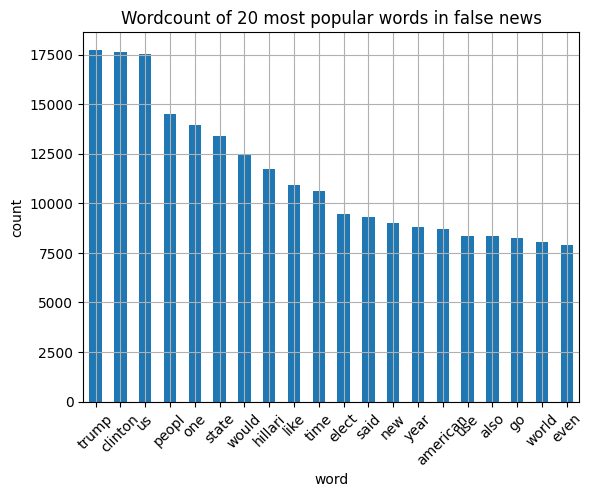

In [30]:
ax = false_counter.iloc[0:20].plot.bar(x='word',y='count', rot=45, grid=True, legend =False,
                                      title="Wordcount of 20 most popular words in false news")
ax.set_ylabel("count")
ax.text=False

### Wordcloud true/false

In [31]:
true_df = true_df.explode('text').reset_index()
true_text = " ".join(true_df.text)
false_df = false_df.explode('text').reset_index()
false_text = " ".join(false_df.text)

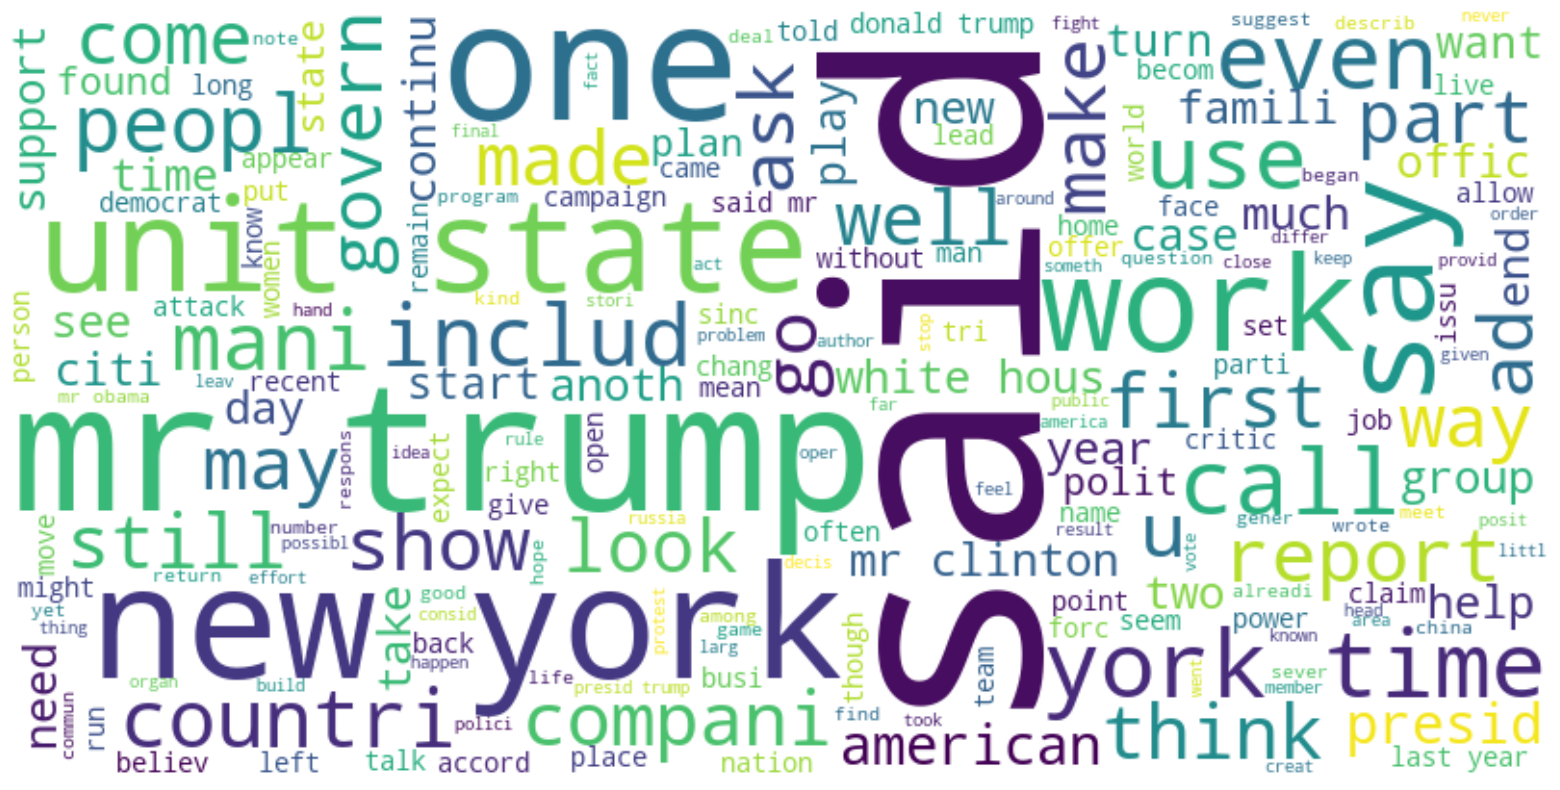

In [32]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(true_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

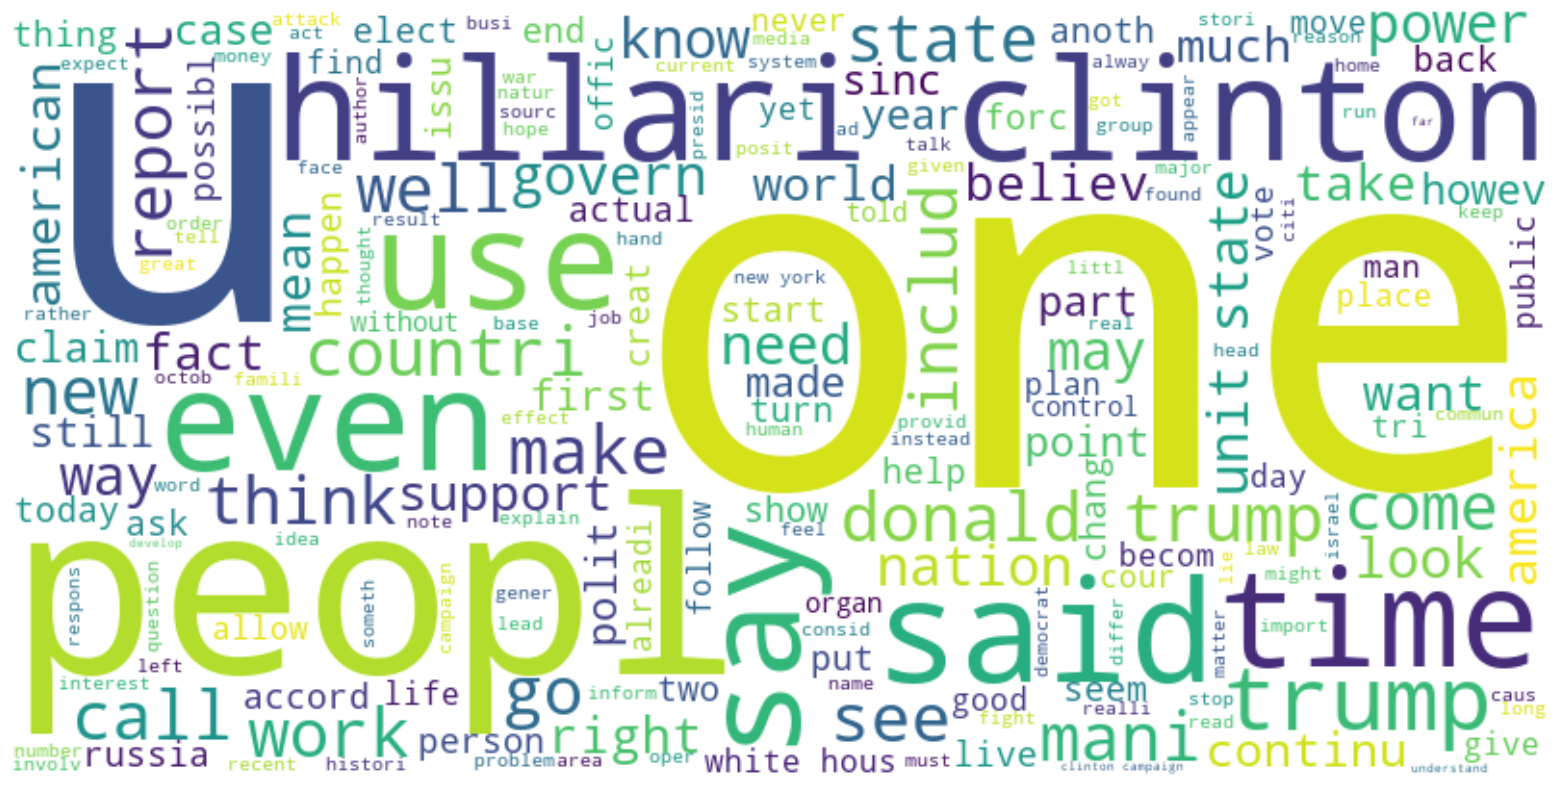

In [33]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(false_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### N-grams tru/false

In [34]:
from nltk import ngrams

true_bigrams = ngrams(true_text.split(),2)
true_counter = pd.Series(true_bigrams).value_counts().reset_index()
true_counter = true_counter.rename(columns={'index':'bigram', 0:'count'})
false_bigrams = ngrams(false_text.split(),2)
false_counter = pd.Series(false_bigrams).value_counts().reset_index()
false_counter = false_counter.rename(columns={'index':'bigram', 0:'count'})

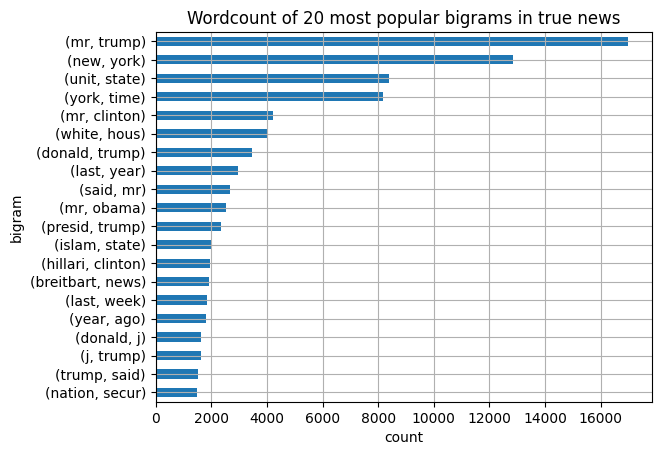

In [35]:
ax = true_counter.iloc[0:20].plot.barh(x='bigram',y='count', grid=True, legend =False,
                                      title="Wordcount of 20 most popular bigrams in true news")
ax.set_xlabel("count")
ax.text=False
ax.invert_yaxis()

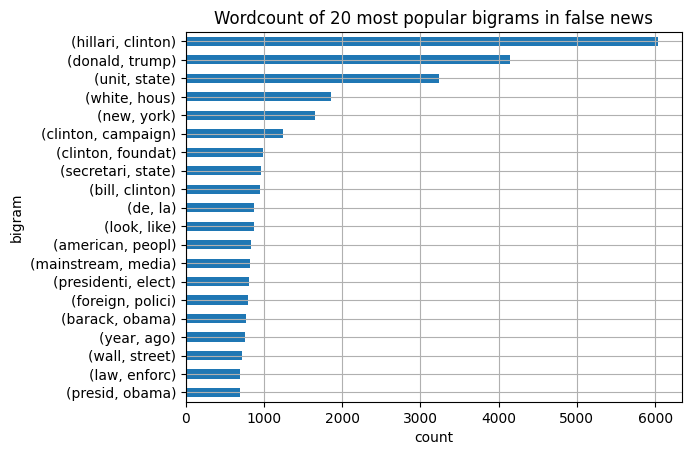

In [36]:
ax = false_counter.iloc[0:20].plot.barh(x='bigram',y='count', grid=True, legend =False,
                                      title="Wordcount of 20 most popular bigrams in false news")
ax.set_xlabel("count")
ax.text=False
ax.invert_yaxis()

### Split the data train test

In [10]:
from sklearn.model_selection import train_test_split 

clean_df = df.apply(lambda row: " ".join(row['text']),axis=1)
X_train, X_test, y_train, y_test = train_test_split(clean_df, df.label, test_size=0.3, random_state=42)

### TF-IDF

In [13]:
X_train

3837     exnato chief need us world policeman domin wag...
4908     jess watter armour rip steph curri contract cr...
9273     hillari perfect corrupt system gillian leav re...
4045     presid joseph kabila dig tension rise congo ne...
2808     automak knew takata airbag hazard year suit sa...
                               ...                        
12819    doj stand music croni capit edward woodson pri...
13605    one everi three ukrainian readi leav countri t...
6151     sail coupl seiz somali pirat 2008 appar abduct...
989      presid trump honor littl sister poor first whi...
17966    occupi david fri releas jail im realli free ad...
Length: 12799, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [25]:
tfidf_train

<12799x129581 sparse matrix of type '<class 'numpy.float64'>'
	with 3473145 stored elements in Compressed Sparse Row format>

In [30]:
import numpy as np

In [32]:
np.where(vectorizer.get_feature_names_out() == 'york')

(array([117530], dtype=int64),)

In [36]:
tfidf_train[:,117530].toarray()

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.01370146],
       [0.        ],
       [0.        ]])

In [37]:
pd.DataFrame(tfidf_train[:,117530].toarray()).to_csv('C:/Users/Norbix/Desktop/out.csv')

In [28]:
pd.DataFrame(tfidf_train.toarray()).to_csv('C:/Users/Norbix/Desktop/out.csv')

MemoryError: Unable to allocate 12.4 GiB for an array with shape (12799, 129581) and data type float64

### Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(tfidf_train,y_train)

In [37]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [13]:
prediction = clf.predict(tfidf_test)

In [14]:
print("Accuracy:",clf.score(tfidf_test,y_test)*100)

Accuracy: 95.71636893911776


In [29]:
print("Report:\n",classification_report(y_test,prediction))

Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3107
           1       0.95      0.95      0.95      2379

    accuracy                           0.96      5486
   macro avg       0.96      0.96      0.96      5486
weighted avg       0.96      0.96      0.96      5486



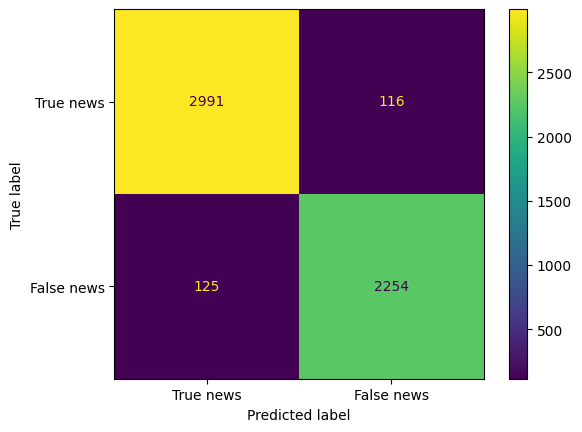

In [28]:
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

In [22]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Zainstalowane/windows_10_msbuild_Release_graphviz-6.0.2-win32/Graphviz/bin'

import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=vectorizer.get_feature_names_out(),
                                class_names=['True news','Fake news'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [33]:
graph.render("decision_tree_graphivz")
'decision_tree_graphivz.png'

'decision_tree_graphivz.png'

In [38]:
clf.get_depth()

53

In [39]:
clf.get_n_leaves()

234

In [15]:
path = clf.cost_complexity_pruning_path(tfidf_train, y_train)

In [16]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [44]:
ccp_alphas.shape

(164,)

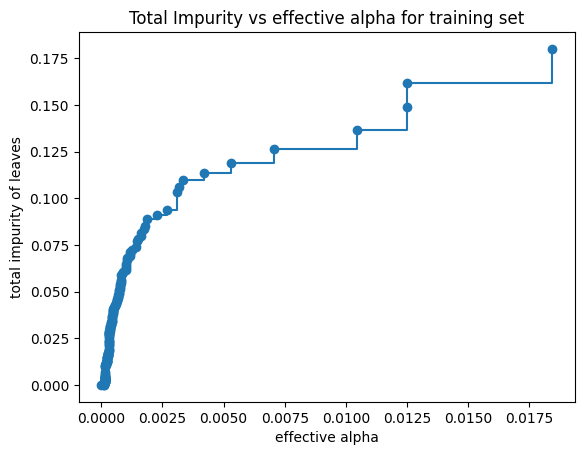

In [48]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [49]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(tfidf_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15548272933995047


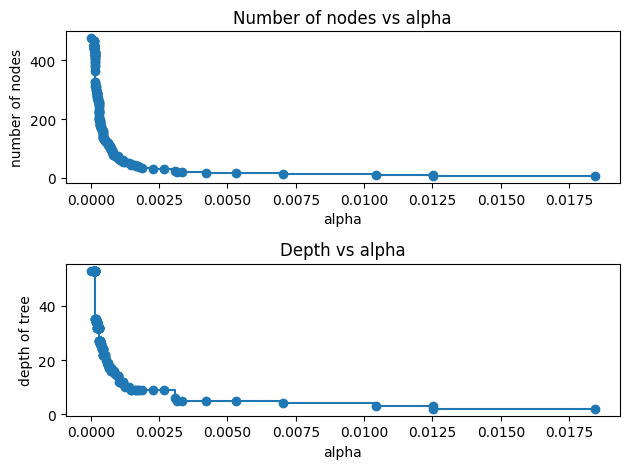

In [50]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

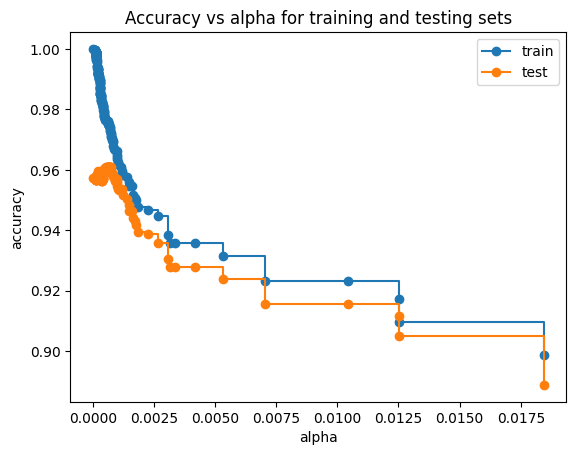

In [51]:
train_scores = [clf.score(tfidf_train, y_train) for clf in clfs]
test_scores = [clf.score(tfidf_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [56]:
print("Accuracy:",max(test_scores)*100)

Accuracy: 96.0991615020051


In [54]:
test_scores.index(max(test_scores))

114

In [17]:
ideal_alpha = ccp_alphas[114]

In [18]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ideal_alpha)
clf = clf.fit(tfidf_train,y_train)

In [19]:
prediction = clf.predict(tfidf_test)

In [20]:
print("Accuracy:",clf.score(tfidf_test,y_test)*100)

Accuracy: 96.08093328472475


In [63]:
print("Report:\n",classification_report(y_test,prediction))

Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3107
           1       0.96      0.95      0.95      2379

    accuracy                           0.96      5486
   macro avg       0.96      0.96      0.96      5486
weighted avg       0.96      0.96      0.96      5486



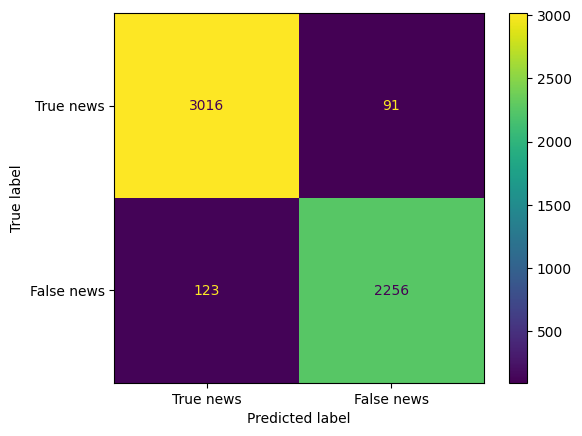

In [64]:
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

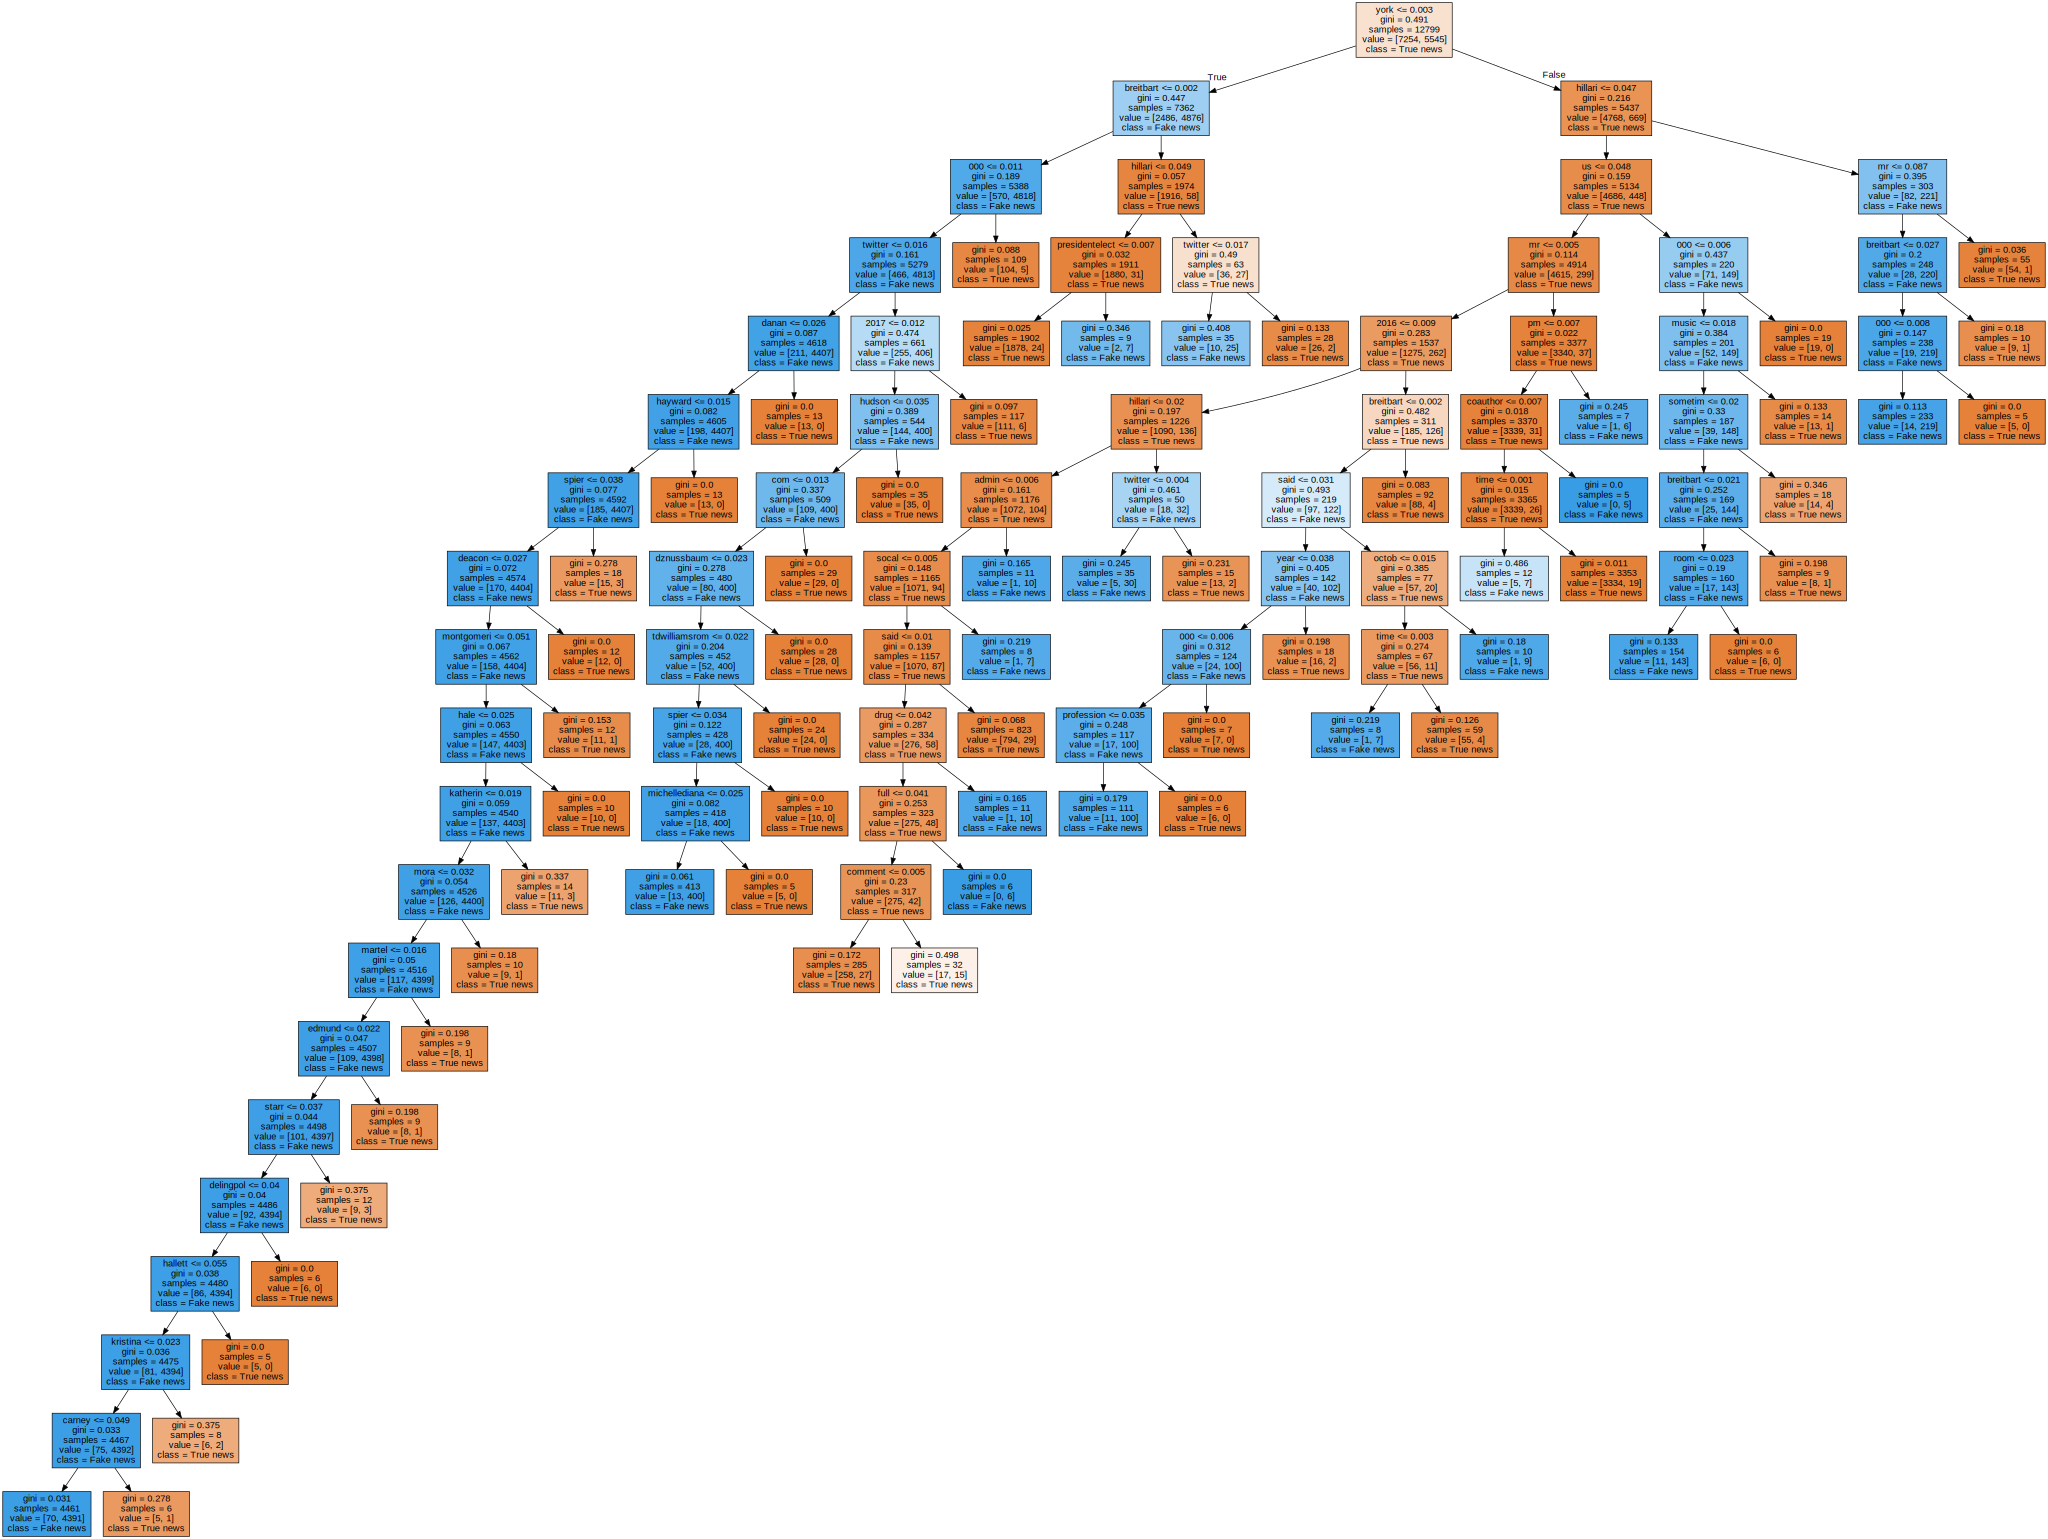

In [23]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=vectorizer.get_feature_names_out(), class_names=['True news','Fake news'], filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [24]:
graph.render("prunned_decision_tree_graphivz")
'prunned_decision_tree_graphivz.png'

'prunned_decision_tree_graphivz.png'

In [68]:
grid_predictions = gdt.predict(tfidf_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3126
           1       0.94      0.94      0.94      2360

    accuracy                           0.95      5486
   macro avg       0.95      0.95      0.95      5486
weighted avg       0.95      0.95      0.95      5486



In [65]:
params = {'max_depth': [5,10,20],
          'min_samples_split': [10,100],
          'min_samples_leaf': [5,10]}
  
gdt = GridSearchCV(DecisionTreeClassifier(), params, refit = True, verbose = 3)
  
# fitting the model for grid search
gdt.fit(tfidf_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.933 total time=   4.6s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.930 total time=   4.5s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.933 total time=   4.7s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.932 total time=   4.5s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=10;, score=0.937 total time=   4.5s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.933 total time=   4.4s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.928 total time=   4.3s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.934 total time=   4.2s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=100;, score=0.933 total time=   4.3s
[CV 5/5] END max_depth=5, min_sampl

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [10, 100]},
             verbose=3)

In [67]:
print(gdt.best_params_)
print(gdt.best_estimator_)

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10)


In [ ]:
path = clf.cost_complexity_pruning_path(tfidf_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [50]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(tfidf_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15201551095916233


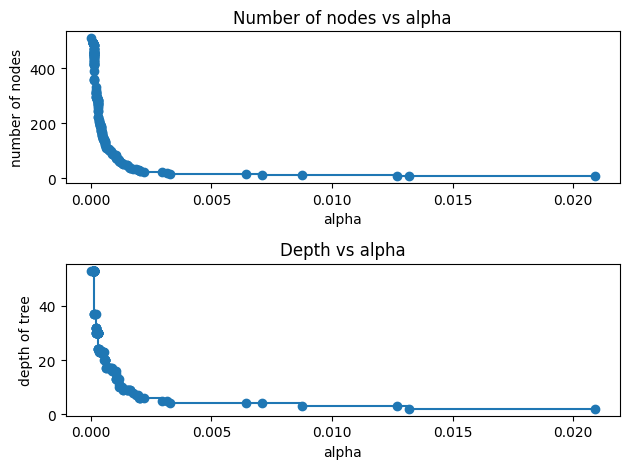

In [51]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

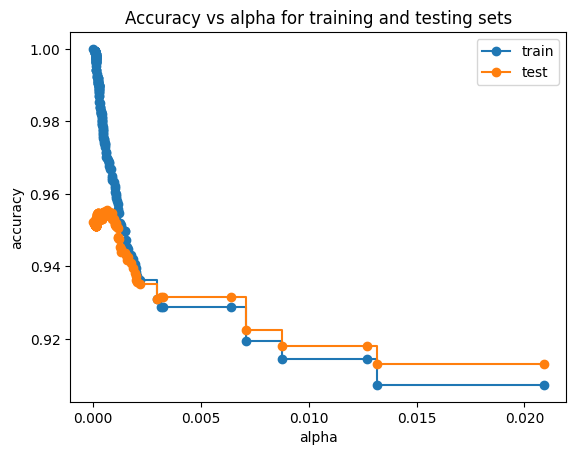

In [53]:
train_scores = [clf.score(tfidf_train, y_train) for clf in clfs]
test_scores = [clf.score(tfidf_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf = rf.fit(tfidf_train,y_train)

In [13]:
print("Accuracy:",rf.score(tfidf_test,y_test)*100)

Accuracy: 92.2712358731316


In [67]:
prediction = rf.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:  [[3070   56]
 [ 369 1991]]


In [68]:
print("Report:\n",classification_report(y_test,prediction))

Report :                precision    recall  f1-score   support

           0       0.89      0.98      0.94      3126
           1       0.97      0.84      0.90      2360

    accuracy                           0.92      5486
   macro avg       0.93      0.91      0.92      5486
weighted avg       0.93      0.92      0.92      5486



In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth': [5,10,20],
    'min_samples_split': [10,100],
    'min_samples_leaf': [5,10]}
}
  
grf = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grf.fit(tfidf_train, y_train)

### Support Vector Machine (SVM)

In [14]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm = svm.fit(tfidf_train,y_train)

In [15]:
print("Accuracy:",svm.score(tfidf_test,y_test)*100)

Accuracy: 97.1928545388261


In [36]:
prediction = svm.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:
 [[3056   70]
 [  72 2288]]


In [37]:
print("Report:\n",classification_report(y_test,prediction))

Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3126
           1       0.97      0.97      0.97      2360

    accuracy                           0.97      5486
   macro avg       0.97      0.97      0.97      5486
weighted avg       0.97      0.97      0.97      5486



In [39]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(tfidf_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.943 total time= 3.7min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.955 total time= 3.8min
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.964 total time= 3.9min
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.951 total time= 3.8min
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.950 total time= 4.0min
[CV 1/5] END ................C=1, kernel=linear;, score=0.968 total time= 2.2min
[CV 2/5] END ................C=1, kernel=linear;, score=0.977 total time= 1.9min
[CV 3/5] END ................C=1, kernel=linear;, score=0.975 total time= 2.2min
[CV 4/5] END ................C=1, kernel=linear;, score=0.969 total time= 1.8min
[CV 5/5] END ................C=1, kernel=linear;, score=0.968 total time= 1.7min
[CV 1/5] END ...............C=10, kernel=linear;, score=0.967 total time= 1.8min
[CV 2/5] END ...............C=10, kernel=linear;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [40]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [41]:
grid_predictions = grid.predict(tfidf_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3126
           1       0.97      0.97      0.97      2360

    accuracy                           0.97      5486
   macro avg       0.97      0.97      0.97      5486
weighted avg       0.97      0.97      0.97      5486



### Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB(random_state=42)
nb = nb.fit(tfidf_train,y_train)

In [76]:
print("Accuracy:",nb.score(tfidf_test,y_test)*100)

Accuracy: 75.95698140721836


In [77]:
prediction = nb.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:  [[3125    1]
 [1318 1042]]


In [78]:
print("Report:\n",classification_report(y_test,prediction))

Report :                precision    recall  f1-score   support

           0       0.70      1.00      0.83      3126
           1       1.00      0.44      0.61      2360

    accuracy                           0.76      5486
   macro avg       0.85      0.72      0.72      5486
weighted avg       0.83      0.76      0.73      5486



In [ ]:
param_grid = { 
    'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
}
  
gnb = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gnb.fit(tfidf_train, y_train)

###  KNN (k- Nearest Neighbors)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(random_state=42)
knn = knn.fit(tfidf_train,y_train)

In [80]:
print("Accuracy:",knn.score(tfidf_test,y_test)*100)

Accuracy: 87.58658403208166


In [81]:
prediction = knn.predict(tfidf_test)
cm = confusion_matrix(y_test,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True news', 'False news'])
disp.plot()
plt.show()

Confusion Matrix:  [[2958  168]
 [ 513 1847]]


In [82]:
print("Report:\n",classification_report(y_test,prediction))

Report :                precision    recall  f1-score   support

           0       0.85      0.95      0.90      3126
           1       0.92      0.78      0.84      2360

    accuracy                           0.88      5486
   macro avg       0.88      0.86      0.87      5486
weighted avg       0.88      0.88      0.87      5486



In [ ]:
param_grid = { 
    'n_neighbors': [2, 5, 10, 20]
}
  
gknn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gknn.fit(tfidf_train, y_train)

### Which classifier has better accuracy

#### https://iopscience.iop.org/article/10.1088/1757-899X/1099/1/012040/pdf